In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arslanaliawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'wordcloud'

In [4]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/yelp/yelp.csv')

In [5]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp_data = data.drop(['business_id','date','review_id','user_id','type'],axis = 1)

In [7]:
yelp_data.head()

,stars,text,cool,useful,funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [8]:
yelp_data = yelp_data.rename(columns={'stars':'Stars','text':'Text','cool':'Cool','useful':'Useful','funny':'Funny'})

In [9]:
yelp_data.head()

,Stars,Text,Cool,Useful,Funny
0,5,My wife took me here on my birthday for breakf...,2,5,0
1,5,I have no idea why some people give bad review...,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [10]:
yelp_data['Text Length'] = yelp_data['Text'].apply(len)

In [11]:
yelp_data.head()

,Stars,Text,Cool,Useful,Funny,Text Length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [12]:
yelp_data.columns

Index(['Stars', 'Text', 'Cool', 'Useful', 'Funny', 'Text Length'], dtype='object')

In [13]:
yelp_data.shape

(10000, 6)

In [14]:
yelp_data.describe()

,Stars,Cool,Useful,Funny,Text Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [15]:
yelp_data.isnull().any()

Stars          False
Text           False
Cool           False
Useful         False
Funny          False
Text Length    False
dtype: bool

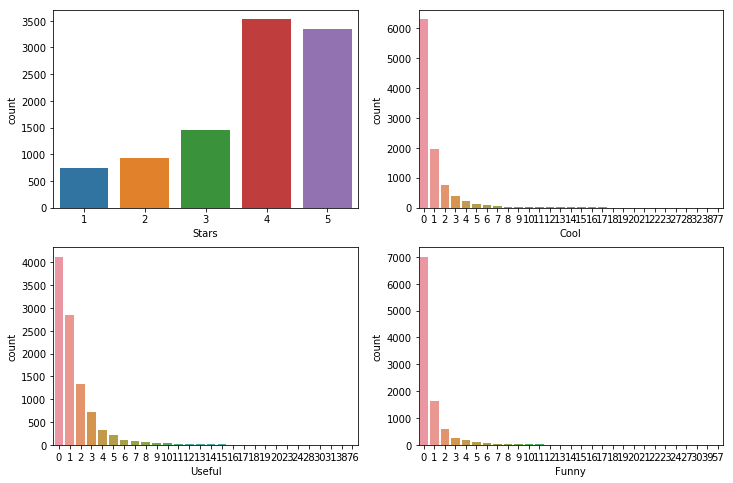

In [16]:
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1= sns.countplot(x='Stars', data= yelp_data)

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='Cool', data=yelp_data)

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='Useful', data=yelp_data)

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='Funny', data=yelp_data)



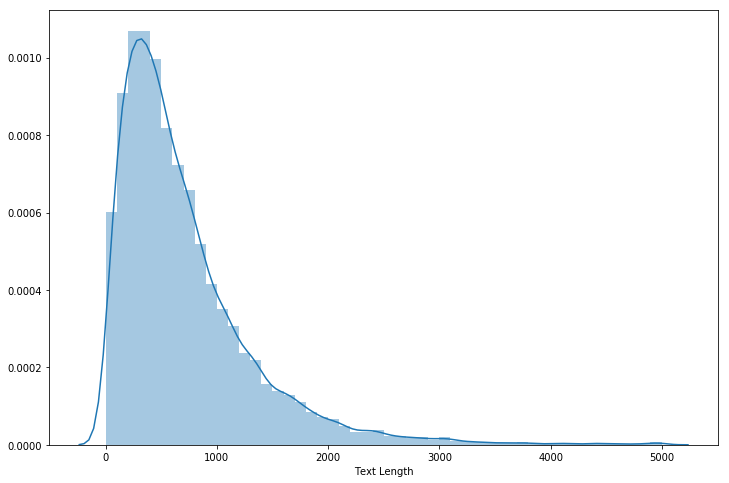

In [17]:
fig = plt.figure(figsize=(12,8))
sns.distplot(yelp_data['Text Length'], kde=True, bins=50)

Text(0.5,1,'Heatmap of Variables')

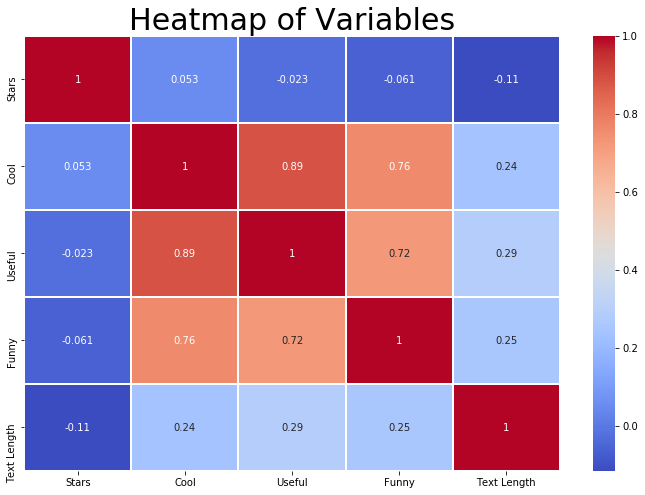

In [18]:
yelp_cor = yelp_data[['Stars', 'Cool', 'Useful', 'Funny', 'Text Length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

In [22]:
yelp_text = yelp_data[['Stars','Text']]

In [23]:
yelp_text.head()

,Stars,Text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [24]:
#this function will remove all punctuations; stopwords; returns a list of 
# a cleaned text

def remove_punc_stopword(text):
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split()if word.lower() not in stopwords.words('english')]
    

In [25]:

yelp_text_allstars = yelp_text.copy()
yelp_text_allstars['Text'] = yelp_text_allstars['Text'].apply(remove_punc_stopword)




In [26]:
yelp_text_allstars.count()


Stars    10000
Text     10000
dtype: int64

In [27]:
yelp_text_allstars.head()

,Stars,Text
0,5,"[wife, took, birthday, breakfast, excellent, w..."
1,5,"[idea, people, give, bad, reviews, place, goes..."
2,4,"[love, gyro, plate, rice, good, also, dig, can..."
3,5,"[rosie, dakota, love, chaparral, dog, park, co..."
4,5,"[general, manager, scott, petello, good, egg, ..."


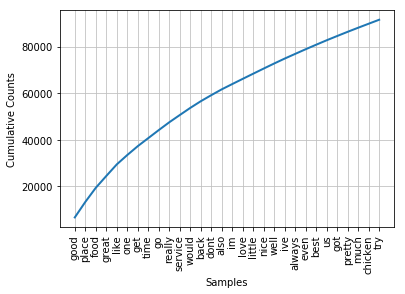

In [33]:
word_split = []
for i in range(0,9999):
    for word in yelp_text_allstars['Text'][i]:
        word_split.append(word)
FreqDist(word_split).plot(30, cumulative=True)       
    

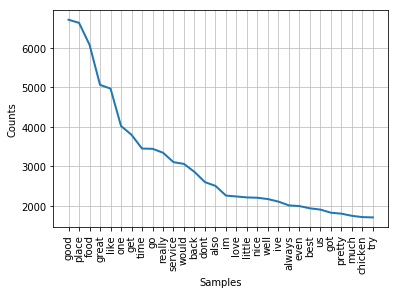

In [34]:
FreqDist(word_split).plot(30, cumulative=False)  

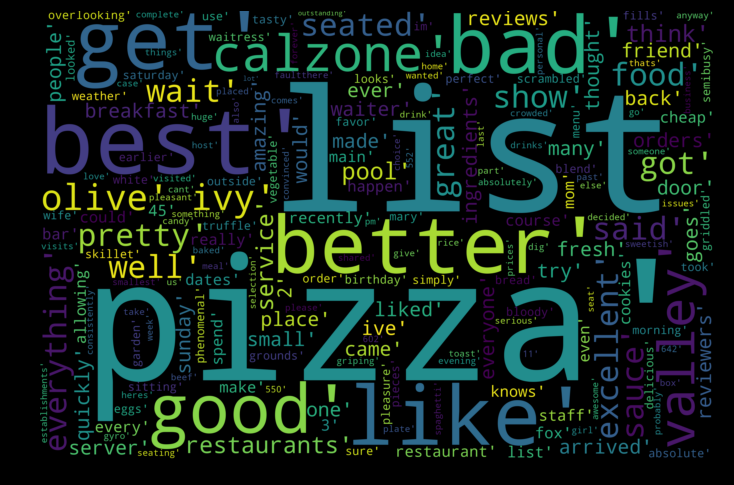

In [38]:
yelp_allstars_text = yelp_text_allstars['Text'].values

wordcloud = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
                     stopwords= STOPWORDS).generate(str(yelp_allstars_text))


fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [52]:
yelp_star5 = yelp_text[yelp_text['Stars']==5]
yelp_star5['Text'] = yelp_star5['Text'].apply(remove_punc_stopword)

In [53]:
yelp_star5.count()

Stars    3337
Text     3337
dtype: int64

In [54]:
yelp_star5.head()

,Stars,Text
0,5,"[wife, took, birthday, breakfast, excellent, w..."
1,5,"[idea, people, give, bad, reviews, place, goes..."
3,5,"[rosie, dakota, love, chaparral, dog, park, co..."
4,5,"[general, manager, scott, petello, good, egg, ..."
6,5,"[drop, youre, drive, ate, go, back, next, day,..."


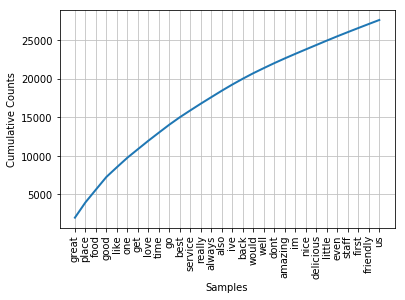

In [55]:
yelp_star5 = yelp_star5.reset_index(drop=True)
word_split = []
for i in range(0,3336):
    for word in yelp_star5['Text'][i]:
        word_split.append(word)
FreqDist(word_split).plot(30, cumulative=True) 

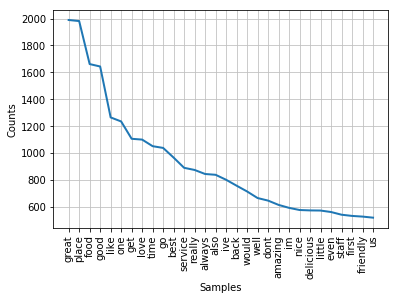

In [56]:
FreqDist(word_split).plot(30, cumulative=False) 

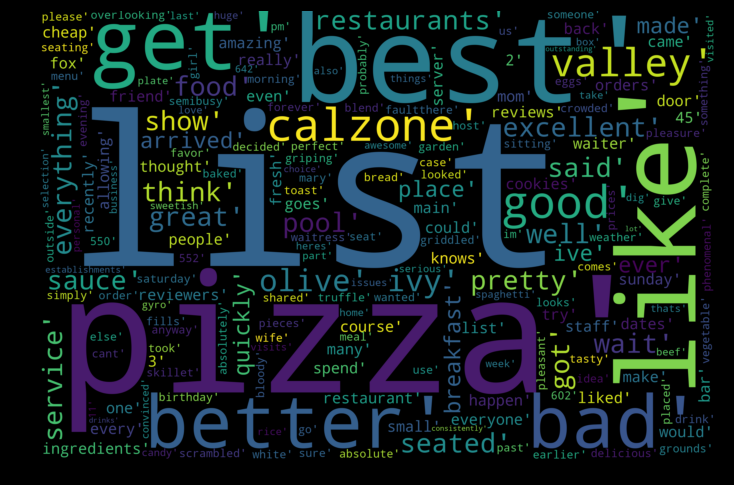

In [57]:
yelp_star5 = yelp_star5['Text'].values

wordcloud = WordCloud(width = 3000,
    height = 2000,
    background_color = 'black',
                     stopwords= STOPWORDS).generate(str(yelp_allstars_text))


fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)